# Normal Curve with 68-95-99.7 Rule

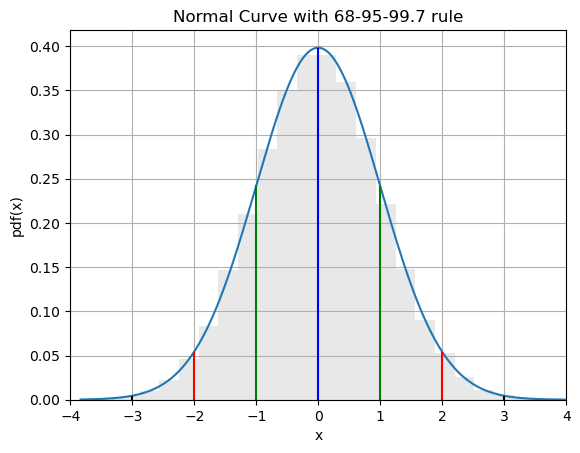

In [ ]:
# the normal curve
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

X = stats.norm.rvs(size=100000)
X.sort()

parameters = stats.norm.fit(X)
mu, sigma = parameters

fig, ax = plt.subplots()
ax.plot(X, stats.norm.pdf(X, loc=mu, scale=sigma))
ax.hist(X, bins=25, density=True, color='lightgray', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_xlim(-4, 4)
ax.grid(True)

plt.vlines(x=-3, ymin=0, ymax=stats.norm.pdf(-3, loc=mu, scale=sigma), color='black')
plt.vlines(x=-2, ymin=0, ymax=stats.norm.pdf(-2, loc=mu, scale=sigma), color='red')
plt.vlines(x=-1, ymin=0, ymax=stats.norm.pdf(-1, loc=mu, scale=sigma), color='green')
plt.vlines(x=0, ymin=0, ymax=stats.norm.pdf(0, loc=mu, scale=sigma), color='blue')
plt.vlines(x=1, ymin=0, ymax=stats.norm.pdf(1, loc=mu, scale=sigma), color='green')
plt.vlines(x=2, ymin=0, ymax=stats.norm.pdf(2, loc=mu, scale=sigma), color='red')
plt.vlines(x=3, ymin=0, ymax=stats.norm.pdf(3, loc=mu, scale=sigma), color='black')

plt.title('Normal Curve with 68-95-99.7 rule')
plt.show()

## One Tailed Test

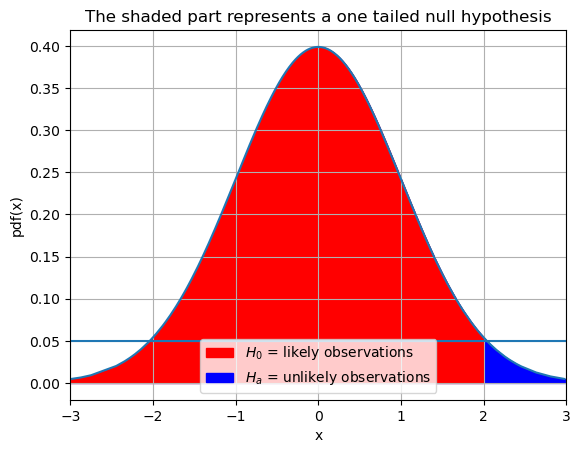

In [ ]:
# example of one tailed hypothesis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as stats

X = stats.norm.rvs(size=1000)
X.sort()
fig, ax = plt.subplots()

ax.plot(X, stats.norm.pdf(X, loc=0, scale=1))
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(-3, 2, 0.01)
ax.set_xlim(-3, 3)
full_range = np.arange(-3, 3, 0.01)
ax.fill_between(full_range, stats.norm.pdf(full_range,loc=0,scale=1), color='b')
ax.fill_between(px,stats.norm.pdf(px, loc=0, scale=1), color='r')
plt.title('The shaded part represents a one tailed null hypothesis')
red_patch = mpatches.Patch(color='red', label=f'$H_0$ = likely observations')
blue_patch = mpatches.Patch(color='blue', label=f'$H_a$ = unlikely observations')
plt.axhline(y=0.05)
plt.legend(handles=[red_patch, blue_patch])
plt.show()

## Two Tailed Test

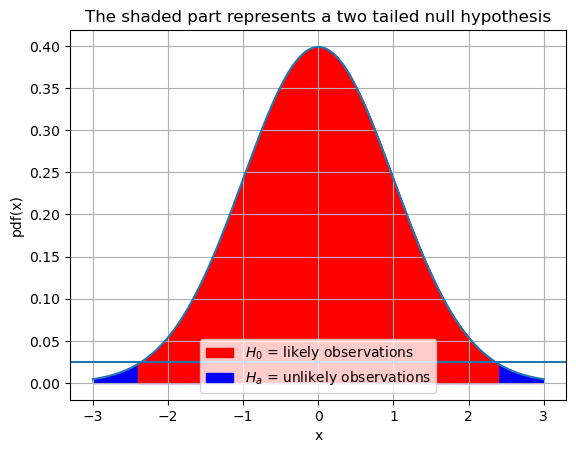

In [ ]:
# example of two tailed hypothesis
x = np.linspace(-3, 3, 1000)

fig, ax = plt.subplots()
ax.plot(x, stats.norm.pdf(x,loc=0,scale=1))
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
stds = 2.4 # how many standard deviations from the mean
full_range = np.arange(-3, 3, 0.01)
ax.fill_between(full_range, stats.norm.pdf(full_range,loc=0,scale=1), color='b')
px=np.arange(-stds,stds,0.01)
ax.fill_between(px,stats.norm.pdf(px,loc=0,scale=1), color='r')
plt.title('The shaded part represents a two tailed null hypothesis')
red_patch = mpatches.Patch(color='red', label=f'$H_0$ = likely observations')
blue_patch = mpatches.Patch(color='blue', label=f'$H_a$ = unlikely observations')
plt.axhline(y=0.025)
plt.legend(handles=[red_patch, blue_patch])
plt.show()

### Level of Significance

The **Level of Significance**, denoted by **$\alpha$ (alpha)**, is a foundational concept in hypothesis testing chosen by the researcher **before** data collection.

### 1. Definition and Type I Error

* **Definition:** $\alpha$ is the probability of the study **rejecting the null hypothesis ($H_0$) when the null hypothesis is actually true**. This is known as a **Type I error** (or false positive).
* **Typical Value:** It is typically set to $0.05$ ($5\%$), meaning the researcher accepts a $5\%$ risk of wrongly concluding that an effect exists.

### 2. Relationship with Confidence Level (Correction)

The formula you listed, **$\alpha = 1 - \text{confidence interval}$**, is **incorrectly stated**. The correct relationship is between the level of significance ($\alpha$) and the **Confidence Level (C)**:

$$\alpha = 1 - C$$

For example, if a researcher uses a $\mathbf{95\%}$ **Confidence Level** ($C = 0.95$), the corresponding **Level of Significance** is $\alpha = 1 - 0.95 = 0.05$.

### 3. Decision Rule: $p$-value vs. $\alpha$

The $p$-value is the probability of obtaining a test result at least as extreme as the one observed, assuming the null hypothesis is true.

* **Statistical Significance:** The result is deemed **statistically significant** when the $p$-value is **less than or equal to $\alpha$** ($p \le \alpha$). When this occurs, the investigator rejects $H_0$ and concludes that the observed effect reflects the characteristics of the whole population.

---

## $\alpha$ and Critical Values ($z$-Distribution)

The level of significance establishes the **rejection region(s)** in the sampling distribution, which are marked by the **critical values** (or $z$-scores in the standard normal distribution).

| Test Type ($\alpha = 0.05$) | Rejection Region | Critical $z$-Value |
| :--- | :--- | :--- |
| **One-Tailed Test** | Extreme values occur in **one tail** only ($\mathbf{5\%}$ in one tail). | $\mathbf{z = \pm 1.645}$ (e.g., $+1.645$ for a right-tailed test) |
| **Two-Tailed Test** | Extreme values are split across **both tails** ($\mathbf{2.5\%}$ in each tail, totaling $5\%$). | $\mathbf{z = \pm 1.960}$ |

These critical values serve as the minimum threshold that the calculated test statistic must meet to fall into the rejection region.

### P-value

* The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

Stephanie Glen. "P-Value in Statistical Hypothesis Tests: What is it?" From StatisticsHowTo.com: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/

* The probability of getting a result at least as extreme as the tail area of concern, if the null hypothesis is true; a tail test

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Empirical_rule_histogram.svg/675px-Empirical_rule_histogram.svg.png' alt='normal curve' />

In [ ]:
# one tail vs two tail
import numpy as np
from scipy import stats

a = 0.05
print(f'One-tailed test: {np.round(np.abs(stats.norm.ppf(a)), 3)}')
print(f'Two-tailed test: {np.round(np.abs(stats.norm.ppf(a/2)), 3)}')

One-tailed test: 1.645
Two-tailed test: 1.96


In [ ]:
# find p value given z left tail
import scipy.stats as stats

print('z=-1.65: ', stats.norm.cdf(-1.65))
print('z=-1.64: ', stats.norm.cdf(-1.64))

stats.norm.sf(abs(-1.64))

z=-1.65:  0.0494714680336481
z=-1.64:  0.05050258347410371


0.05050258347410371

In [ ]:
# find p value given z two tail
stats.norm.sf(abs(2))*2

0.04550026389635839

### Pizza Example

Pizza delivery takes, on average, 31 minutes with a standard deviation of 7 minutes. We want faster delivery times so we provide bonuses to drivers that deliver under 30 minutes. We take a sample of size 40 of these new deliveries and find that the mean of the sample = 28. We want the confidence level to be 95%.

- State the null hypothesis: $H_0: \mu \geq 31$
- State the alternative hypothesis: $H_a: \mu \lt 31$
- Determine test type (left tail, right tail, two tail)
- Since we want an improved outcome this will be one tailed left
- $z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$

In [ ]:
# find test statistic from our formula
import numpy as np

test_statistic = (28 - 31) / (7/np.sqrt(40))
np.round(test_statistic, 3)

-2.711

In [ ]:
# find critical value
from scipy import stats

critical_value = stats.norm.ppf(0.05)
np.round(critical_value, 3)

-1.645

Since -2.711 < -1.645 we reject the null hypothesis.

In [ ]:
# p-value approach
import scipy.stats as stats

np.round(stats.norm.sf(abs(test_statistic)), 3)

0.003